In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_56217_I')

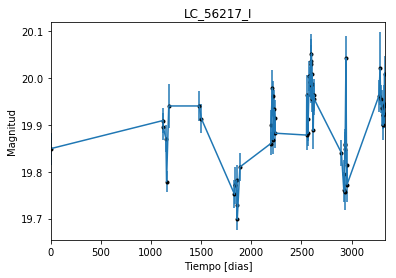

In [5]:
data = np.genfromtxt('LC_56217_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_56217_I')

In [6]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [7]:
%%capture capt
sample = model.run_mcmc(20000)

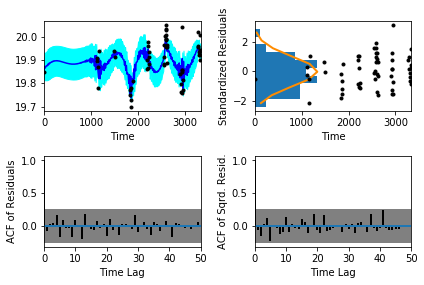

In [8]:
sample.assess_fit()

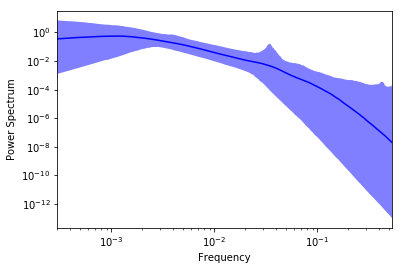

In [9]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [10]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_56217_I')

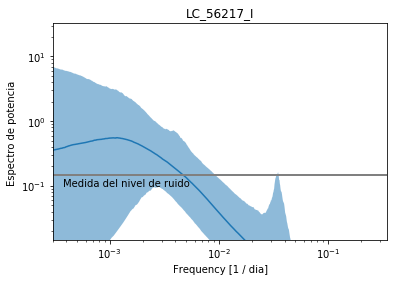

In [11]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_56217_I')

Text(0.5,1,'Prediccion , valor esperado LC_56217_I')

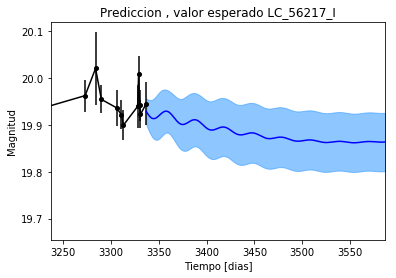

In [12]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_56217_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_56217_I')

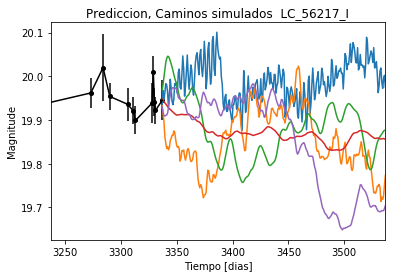

In [13]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_56217_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_56217_I')

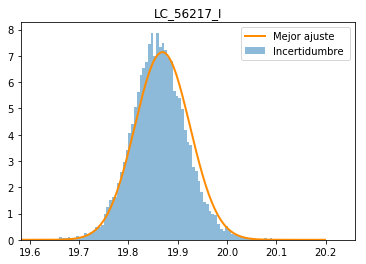

In [14]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_56217_I')

Text(0.5,1,'Interpolacion, camino simulado LC_56217_I')

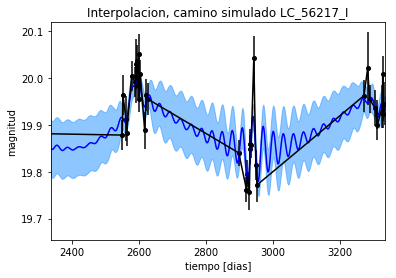

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56217_I')

Text(0.5,1,'Interpolacion, camino simulado LC_56217_I')

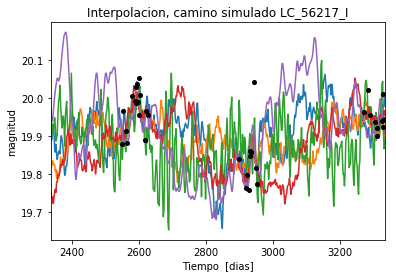

In [16]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_56217_I')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [18]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 296.242672271
Median: 0.0127667732671
Standard deviation: 0.199242584613
68% credibility interval: [ 0.00182078  0.17620089]
95% credibility interval: [  5.03207497e-04   8.00329059e-01]
99% credibility interval: [  3.39412174e-04   1.02041008e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 949.177453462
Median: 0.00619336559636
Standard deviation: 0.109332000062
68% credibility interval: [ 0.00121199  0.06087516]
95% credibility interval: [ 0.00040788  0.36326066]
99% credibility interval: [  3.22356882e-04   7.29138009e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 371.489724299
Median: 0.0605573948893
Standard d

In [19]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 646.190223371
Median: 110.234424977
Standard deviation: 2.15031527319
68% credibility interval: [ 108.02870326  111.97434707]
95% credibility interval: [ 105.19437324  113.88171866]
99% credibility interval: [ 103.10898584  114.55199643]


In [20]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 315.401686022
Median: 1.06591505767
Standard deviation: 2.59678253037
68% credibility interval: [ 0.09172595  4.89963738]
95% credibility interval: [ 0.02229068  8.94176107]
99% credibility interval: [  0.01432692  11.86678288]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 686.938597905
Median: 1.23234524293
Standard deviation: 11.7537495958
68% credibility interval: [  0.05895912  14.40219265]
95% credibility interval: [  2.29359991e

In [21]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: nan
Median: 1.38234803571e-06
Standard deviation: inf
68% credibility interval: [  3.90014489e-073   2.15452843e+122]
95% credibility interval: [  8.41323656e-108   4.96870915e+151]
99% credibility interval: [  4.03512342e-149   8.53041178e+152]


In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1627.17691936
Median: 19.8823740054
Standard deviation: 0.0264602780665
68% credibility interval: [ 19.85945007  19.90443994]
95% credibility interval: [ 19.82850217  19.93281172]
99% credibility interval: [ 19.79287496  19.95779896]


In [23]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 331.012883085
Median: 0.047361068623
Standard deviation: 0.280316667801
68% credibility interval: [ 0.          0.51383125]
95% credibility interval: [ 0.          0.97653877]
99% credibility interval: [ 0.          1.03986883]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 331.012883085
Median: 0.047361068623
Standard deviation: 0.280316667801
68% credibility interval: [ 0.          0.51383125]
95% credibility interval: [ 0.          0.97653877]
99% credibility interval: [ 0.          1.03986883]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 803.483787062
Median: 0.0
Standard deviation: 0.00136362319293
68% credi

In [24]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 646.190223371
Median: 110.234424977
Standard deviation: 2.15031527319
68% credibility interval: [ 108.02870326  111.97434707]
95% credibility interval: [ 105.19437324  113.88171866]
99% credibility interval: [ 103.10898584  114.55199643]


In [25]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1755.05214154
Median: 0.00605773997966
Standard deviation: 0.00444839517653
68% credibility interval: [ 0.0040937   0.00977821]
95% credibility interval: [ 0.00286705  0.01884383]
99% credibility interval: [ 0.0022329   0.03087687]


In [26]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 952.848690827
Median: 1.12310718881
Standard deviation: 0.221468768639
68% credibility interval: [ 0.9334154  1.3629621]
95% credibility interval: [ 0.78657429  1.66032751]
99% credibility interval: [ 0.71018303  1.8403798 ]


In [27]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 199.469949569
Median: 6.71735656974e-05
Standard deviation: 0.316113063863
68% credibility interval: [  1.21409327e-125   7.75825053e-002]
95% credibility interval: [  4.04588845e-154   1.07212115e+000]
99% credibility interval: [  1.27623854e-155   2.19274137e+000]


In [28]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 296.242672271
Median: (-0.080216002212-0.2515471252j)
Standard deviation: 2.16085897068
68% credibility interval: [-1.10710282+0.j         -0.01144031-0.44368212j]
95% credibility interval: [ -5.02861578e+00+0.j          -3.16174595e-03-0.18724773j]
99% credibility interval: [ -6.41142559e+00+0.j          -2.13258959e-03-0.19751152j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 949.177453462
Median: (-0.038914063717+2.46429148174j)
Standard deviation: 1.89050720311
68% credibility interval: [-0.38248989+0.j         -0.00761516+0.06324016j]
95% credibility interval: [-2.28243406+2.17143785j -0.00256278+0.0034787j ]
99% credibility interval: [ -4.58130922e+00+5.35631806j  -2.02542803e-03+0.j        ]
Posterior summary